# Projet

Groupe : Brenton, Maxime

Cours : Mathematical Foundation for Artificial Intelligence

Date : Mercredi 14 Juin

## La mise en œuvre de base du jeu

### Données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
def tracerPlateau(A):
    n, m = A.shape
    
    plt.xlim(-0.5, n - 0.5)
    plt.ylim(m - 0.5, -0.5)
    
    plt.xticks(np.arange(-0.5, n - 0.5, 1))
    plt.yticks(np.arange(-0.5, m - 0.5, 1))
    plt.tick_params(which = 'major', labelbottom = False, labelleft = False)
    plt.gca().xaxis.tick_top()

    plt.minorticks_on()
    plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
    plt.gca().xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))
    plt.gca().yaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))

    plt.tick_params(which = 'minor', top = False, left = False, labeltop = True)
    N = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] == 1])
    B = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] == -1])
    P = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] > 1])
    if N.shape[0] > 0:
        plt.scatter(N[:, 1], N[:, 0], marker='o', s = 400, c = 'r')
    if B.shape[0] > 0:
        plt.scatter(B[:, 1], B[:, 0], marker='o', s = 400, c = 'b')
    if P.shape[0] > 0:
        plt.scatter(P[:, 1], P[:, 0], marker='*', s = 400,alpha=0.5, c = 'g')
    for i in range(P.shape[0]):
        plt.text(P[:, 1][i], P[:, 0][i],i+1,verticalalignment="center",horizontalalignment="center")
    plt.grid() 
    plt.plot()

### Global Variables Constantes

In [18]:
DIRECTIONS = np.array([[0, 1], [1, 0], [0, -1], [-1, 0],
                       [1, 1], [1, -1], [-1, 1], [-1, -1]])
                       
ALPHA = -np.inf 
BETA = np.inf

CORNER_PLACES = np.array([[0, 0], [0, 7], [7, 0], [7, 7]])
CORNER_NEIGHBORS = np.array([[0, 1], [1, 0], [1, 1],
                              [0, 6], [1, 6], [1, 7],
                               [6, 0], [6, 1], [7, 1],
                                [6, 6], [6, 7], [7, 6]])

SECRET_BUTTON = True # Very secret !!!

### Fonctions nécessaires

- `init_plateau()` : initialise le plateau de jeu
- `judge_valide(A, c)` : vérifie si le coup est valide

asdf asdf asd wad[sg ewaf wea1! @! ~!@!!!!!!!!!!!!!!!!]

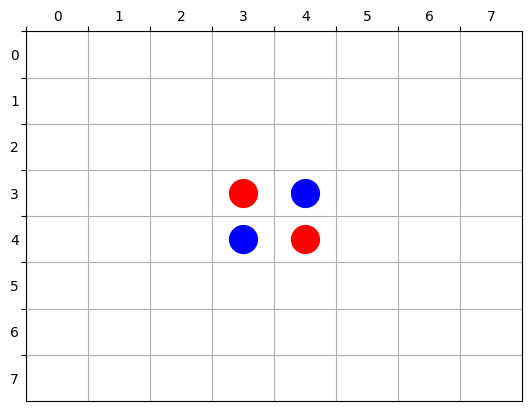

In [4]:
def init_plateau():
    A = np.zeros((8, 8), int)
    A[3, 3] = 1
    A[4, 4] = 1
    A[3, 4] = -1
    A[4, 3] = -1
    return A

A = init_plateau()
tracerPlateau(A)

---------Possible Steps---------
Step: [2, 4], Changes: [[3, 4]]
Step: [3, 5], Changes: [[3, 4]]
Step: [4, 2], Changes: [[4, 3]]
Step: [5, 3], Changes: [[4, 3]]
---------Possible Steps---------


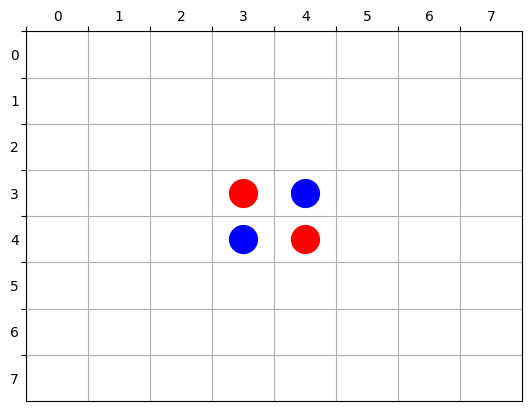

In [5]:
def find_possible_steps(A, c, print_info=False):
    """
    A : np.array, le plateau
    c : int, le joueur
    """
    
    n, m = A.shape

    possible_steps = []
    possible_steps_changes = []
    
    for i in range(n):
        for j in range(m):
            change_flag = False
            if A[i, j] == 0:
                possible_steps_changes_dir = []
                changes_correspond_list = []
                for step in DIRECTIONS:
                    x, y = i, j # une copy de i, j
                    move = 0

                    
                    x += step[0]
                    y += step[1]
                    
                    while 0 <= x and x < n and 0 <= y and y < m:
                        if A[x, y] == 0:
                            break
                        
                        if A[x, y] == c:
                            if move > 0:
                                change_flag = True
                                for k in range(1, move + 1):
                                    changes_correspond_list.append([i + k * step[0], j + k * step[1]])
                            break

                        if A[x, y] == -c:
                            x += step[0]
                            y += step[1]
                            move += 1
                            
                        
                if changes_correspond_list:
                    possible_steps_changes_dir.append(changes_correspond_list)
                
                if possible_steps_changes_dir:    
                    possible_steps_changes.extend(possible_steps_changes_dir)
                
            if change_flag:
                possible_steps.append([i, j])
    
    if print_info:
        print("---------Possible Steps---------")
        for step, change in zip(possible_steps, possible_steps_changes):
            print(f"Step: {step}, Changes: {change}")
        print("---------Possible Steps---------")
          
    return possible_steps, possible_steps_changes

A = init_plateau()
tracerPlateau(A)
_ = find_possible_steps(A, c=1, print_info=True)

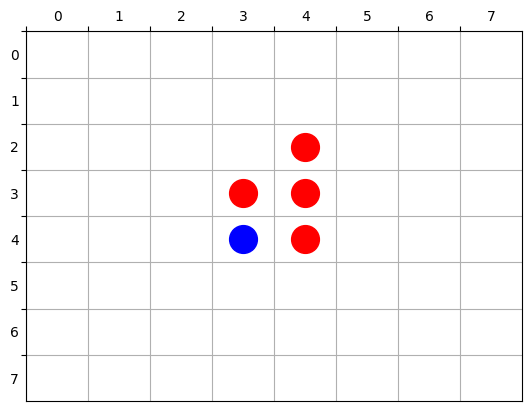

In [6]:
def update(A, c, step=None, changes=None):
    A = A.copy()
    if step:    
        if not changes:
            "If changes are not given, we are going to find the corresponding changes"
            possible_steps, possible_steps_changes = find_possible_steps(A, c)
        
            if possible_steps:     
                "If there are possible steps, we are going to check if the step is valid"
                assert step in possible_steps, "Invalid Step"
                for candidate_step, candidate_change in zip(possible_steps, possible_steps_changes):
                    if candidate_step == step:
                        for change in candidate_change:
                            A[change[0], change[1]] = c
                        A[step[0], step[1]] = c
                        break
            
            "If there are no possible steps, we are going to skip the step"
                

        else:
            "If changes are given, we are going to skip the step check"
            A[step[0], step[1]] = c
            for i in range(len(changes)):
                A[changes[i][0], changes[i][1]] = c
    
    return A

A = init_plateau()                
A = update(A, c=1, step=[2, 4])
tracerPlateau(A)

In [7]:
def game_finish(A):
    game_status = False
    if np.sum(A == 0) == 0:
        game_status = True
    
    if not find_possible_steps(A, c=1)[0] and not find_possible_steps(A, c=-1)[0]:
        game_status = True

    return game_status

A = init_plateau()
game_finish(A)

False

Rouge 4 --- 1 Bleu


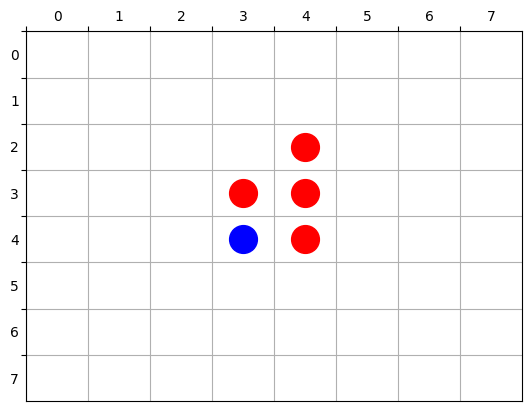

In [8]:
def print_info(A):
    print("Rouge {} --- {} Bleu".format(np.sum(A == 1), np.sum(A == -1)))
    tracerPlateau(A)
    
A = init_plateau()
A = update(A, c=1, step=[2, 4])
print_info(A)

## Algorithms

### 0. Selectionner les coups possibles (Random)

Rouge 9 --- 19 Bleu


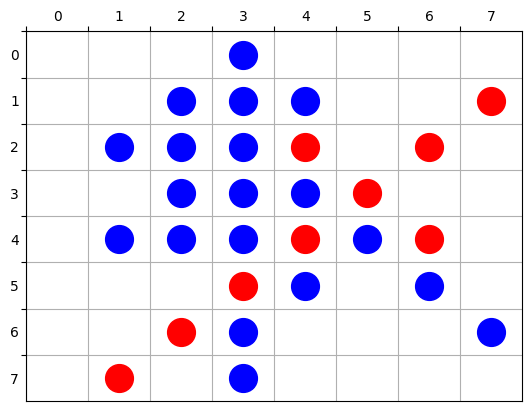

In [9]:
def game_auto(A, c, maximum_steps=None):
    if maximum_steps:
        steps_left = maximum_steps
    else:
        steps_left = 10000 # The number of maximum_steps will not end the while loop
        
    while not game_finish(A) and steps_left:
        possible_steps, possible_steps_changes = find_possible_steps(A, c)
        steps_left -= 1
        
        if possible_steps:
            step = random.choice(possible_steps)
            A = update(A, c, step, possible_steps_changes[possible_steps.index(step)])
            # tracerPlateau(A)
            plt.show()
            c = -c
        else:
            c = -c
    return A
         
A = init_plateau()
print_info(game_auto(A, c=1, maximum_steps=24)) # 24 steps is the maximum steps for the game, 12 steps for each player

Le temps pour finir un jeu :

In [10]:
%timeit A = init_plateau(); game_auto(A, c=1)

39 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 1. Minmax

#### a. Minmax (Basique)

In [11]:
def score(A):
    return np.sum(A == 1) - np.sum(A == -1)

score(A)

0

In [12]:
def minmax(A, c, depth):
    if depth == 0 or game_finish(A):
        return None, score(A)
    
    possible_steps, possible_steps_changes = find_possible_steps(A, c)
    
    if not possible_steps:
        return None, score(A)
    
    score_global = -c * np.inf
    
    for steps, changes in zip(possible_steps, possible_steps_changes):
        A_copy = update(A, c, steps, changes)
        step_next_depth, score_next_depth = minmax(A_copy, -c, depth - 1)
        
        if c==1 and score_next_depth > score_global:
            score_global = score_next_depth
            step = steps
            
        if c==-1 and score_next_depth < score_global:
            score_global = score_next_depth
            step = steps
    
    return step, score_global

A = init_plateau()
minmax(A, 1, 5)

([2, 4], 3)

In [13]:
def alpha_beta(A, c, depth):
    global alpha, beta
    if depth == 0 or game_finish(A):
        return None, score(A)
    
    possible_steps, possible_steps_changes = find_possible_steps(A, c)
    if not possible_steps:
        return None, score(A)
    
    score_global = -c * np.inf
    alpha = ALPHA; beta = BETA
    
    for steps, changes in zip(possible_steps, possible_steps_changes):
        A_copy = update(A, c, steps, changes)
        step_next_depth, score_next_depth = alpha_beta(A_copy, -c, depth - 1)
        
        if c==1:
            if score_next_depth > score_global:
                score_global = score_next_depth                 
                step = steps

            if score_global > alpha:
                alpha = score_global
                if alpha >= beta:
                    break
               
        if c==-1:
            if score_next_depth < score_global:
                score_global = score_next_depth
                step = steps
            
            if score_global < beta:
                beta = score_global
                if beta <= alpha:
                    break
            
    return step, score_global

A = init_plateau()
alpha_beta(A, 1, 5)

([4, 2], 5)

## Jouer

### 1. Alpha_Beta Minmax vs Random (Automatiquement)

In [14]:
def Alpha_Beta_Minmax_vs_Random():
    A = init_plateau()
    c = 1

    while not game_finish(A):
        possible_steps, possible_steps_changes = find_possible_steps(A, c)
        
        if c == 1:
            if possible_steps:
                step = alpha_beta(A, c, depth=5)[0]
                A = update(A, c, step, possible_steps_changes[possible_steps.index(step)])
                plt.show()
        if c == -1:
            if possible_steps:
                step = random.choice(possible_steps)
                A = update(A, c, step, possible_steps_changes[possible_steps.index(step)])
                plt.show()
        c = -c
    
    return A

A = Alpha_Beta_Minmax_vs_Random()
print_info(A)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/linnan/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/mf/g5y5hwk14_dcz0m06zfvvcbc0000gn/T/ipykernel_8366/2901942794.py", line 22, in <module>
    A = Alpha_Beta_Minmax_vs_Random()
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/mf/g5y5hwk14_dcz0m06zfvvcbc0000gn/T/ipykernel_8366/2901942794.py", line 10, in Alpha_Beta_Minmax_vs_Random
    step = alpha_beta(A, c, depth=5)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/mf/g5y5hwk14_dcz0m06zfvvcbc0000gn/T/ipykernel_8366/1577017299.py", line 15, in alpha_beta
    step_next_depth, score_next_depth = alpha_beta(A_copy, -c, depth - 1)
                                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/mf/g5y5hwk14_dcz0m06zfvvcbc0000gn/T/ipykernel_8366/1577017299.py", line 15, in alpha_beta
    step_next_depth, score

In [ ]:
def Play():

    A = init_plateau()

    Game_mode = int(input('Choisissez votre couleur: Rouge[1] ou Bleu[-1]'))

    if Game_mode == -1:
        print('Votre couleur: Bleu  Étapes possibles: Les étoiles')
        
        while not game_finish(A):
            possible_steps1, possible_steps_changes1 = find_possible_steps(A, 1)

            if possible_steps1:
                step = alpha_beta(A, 1, 6)[0]
                A = update(A, 1, step, possible_steps_changes1[possible_steps1.index(step)])
            
            possible_steps2, possible_steps_changes2 = find_possible_steps(A, -1)
            
            if possible_steps2:
                B = A.copy()
                for i in range(len(possible_steps2)):
                    B[possible_steps2[i][0],possible_steps2[i][1]] = i+2
                tracerPlateau(B)
                plt.show()
                user_step = input('Choisir votre étape'+str(possible_steps2)+':')
                User_step = possible_steps2[int(user_step)-1]
                A = update(A, -1, User_step, possible_steps_changes2[possible_steps2.index(User_step)])
                tracerPlateau(A)
                plt.show()

    if Game_mode == 1:
        print('Votre couleur: Rouge  Étapes possibles: Les étoiles')
            
        while not game_finish(A):       
            possible_steps1, possible_steps_changes1 = find_possible_steps(A, 1)
            
            if possible_steps1:
                B = A.copy()
                for i in range(len(possible_steps1)):
                    B[possible_steps1[i][0],possible_steps1[i][1]] = i+2
                tracerPlateau(B)
                plt.show()
                user_step = input('Choisir votre étape'+str(possible_steps1)+':')
                User_step = possible_steps1[int(user_step)-1]
                A = update(A, 1, User_step, possible_steps_changes1[possible_steps1.index(User_step)])
                tracerPlateau(A)
                plt.show()

            possible_steps2, possible_steps_changes2 = find_possible_steps(A, -1)

            if possible_steps2:
                step = alpha_beta(A, -1, 6)[0]
                A = update(A, -1, step, possible_steps_changes2[possible_steps2.index(step)])
                    
    if np.sum(A == 1) > np.sum(A == -1):       
        print("Le résultat, Rouge gagne : {} --- {} ".format(np.sum(A == 1), np.sum(A == -1)))
    if np.sum(A == 1) < np.sum(A == -1): 
        print("Le résultat, Bleu gagne : {} --- {} ".format(np.sum(A == 1), np.sum(A == -1)))        
    if np.sum(A == 1) == np.sum(A == -1): 
        print("Le résultat, Match nul : {} --- {} ".format(np.sum(A == 1), np.sum(A == -1)))        
Play()


ValueError: invalid literal for int() with base 10: ''

### 2. LDA - Improvements on the "score" function

In [ ]:
if SECRET_BUTTON:
    game_list = []; result_list = []
    for fois in range(1000):
        A = init_plateau()
        A = game_auto(A, c=1)
        game_list.append(A.flatten())
        if score(A) > 0:
            result_list.append(1)
        elif score(A) < 0:
            result_list.append(-1)
        else:
            result_list.append(0)
        if fois % 1000 == 0:
            print(f"Nous avons fait {fois}/{40000} fois")
            
    game_list = np.array(game_list) 
    result_list = np.array(result_list)
    game_list.tofile("game_list.csv")
    result_list.tofile("result_list.csv")

Nous avons fait 0/40000 fois


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
def calculate_info(A):
    info_list = []
    

In [ ]:
plateau_count = np.zeros_like(A)

for fois in range(1000):
    A = init_plateau()
    A = game_auto(A, c=1)
    A = np.array(A)
    
    if score(A) > 0:
        plateau_count[A == 1] += 1
    if score(A) < 0:
        plateau_count[A == -1] += 1


In [ ]:
plateau_count1 = np.zeros_like(A)

for fois in range(5000):
    A = init_plateau()
    A = game_auto(A, c=1)
    A = np.array(A)
    
    if score(A) > 0:
        for i in range(8):
            for j in range(8):
                if A[i,j] == 1:
                    plateau_count1[i,j] = plateau_count1[i,j]+1
    if score(A) < 0:
        for i in range(8):
            for j in range(8):
                if A[i,j] == 1:
                    plateau_count1[i,j] = plateau_count1[i,j]-1


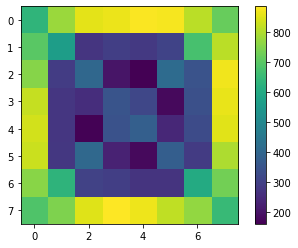

In [ ]:
plt.imshow(plateau_count1)
plt.colorbar()

In [ ]:
plateau_count1

array([[636, 778, 857, 866, 883, 875, 811, 718],
       [700, 565, 274, 295, 281, 307, 676, 812],
       [754, 290, 403, 204, 162, 414, 346, 871],
       [823, 277, 256, 350, 316, 180, 339, 862],
       [836, 277, 165, 345, 380, 244, 328, 853],
       [827, 278, 407, 230, 181, 378, 289, 796],
       [757, 632, 305, 296, 272, 270, 606, 731],
       [687, 745, 850, 886, 867, 818, 770, 649]])

In [ ]:
plateau_count.sum()/64

530.671875

In [ ]:
game_list = []; result_list = []
for fois in range(TOTAL_FOIS):
    A = init_plateau()
    A = game_auto(A, c=1)
    game_list.append(A.flatten())
    if score(A) > 0:
        result_list.append(1)
    elif score(A) < 0:
        result_list.append(-1)
    else:
        result_list.append(0)
    if fois % 400 == 0:
        print(f"Nous avons fait {fois}/{TOTAL_FOIS} fois")

Nous avons fait 0/2000 fois
Nous avons fait 400/2000 fois
Nous avons fait 800/2000 fois
Nous avons fait 1200/2000 fois
Nous avons fait 1600/2000 fois


In [ ]:
game_list = np.array(game_list)
result_list = np.array(result_list)

game_list.shape, result_list.shape

((2000, 64), (2000,))

### Monte Carlo Tree Search

https://www.zhihu.com/question/39916945
SELECTION

The idea is to keep selecting best child nodes until we reach the leaf node of the tree. A good way to select such a child node is to use UCT (Upper Confidence Bound applied to trees) formula:

	wi/ni + c*sqrt(t)/ni
wi = number of wins after the i-th move
ni = number of simulations after the i-th move
c = exploration parameter (theoretically equal to √2)
t = total number of simulations for the parent node

EXPANSION:

When it can no longer apply UCT to find the successor node, it expands the game tree by appending all possible states from the leaf node.

SIMULATION:

After Expansion, the algorithm picks a child node arbitrarily, and it simulates entire game from selected node until it reaches the resulting state of the game. If nodes are picked randomly during the play out, it is called light play out. You can also opt for heavy play out by writing quality heuristics or evaluation functions.

BACKPROPAGATION:

Once the algorithm reaches the end of the game, it evaluates the state to figure out which player has won. It traverses upwards to the root and increments visit score for all visited nodes. It also updates win score for each node if the player for that position has won the playout.

In [ ]:
TIME_LIMIT = 9.5
UCT_C = 1.414
UCT_FUNC = lambda w_i, n_i, n: w_i / n_i + UCT_C * np.sqrt(np.log(n) / n_i)

In [ ]:
def uct_algorithm(A, c):

SyntaxError: incomplete input (278754776.py, line 1)